<a href="https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/FerroNet/dm3_to_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quick dm3-to-numpy translation

Notebook prepared by Maxim Ziatdinov

The purpose of this notebook is to show how to quickly transform your dm3 data to numpy array in google colab using pydm3reader (http://microscopies.med.univ-tours.fr) so that you can apply the machine learning workflows described in this section to your data. Generally, however, it is recommended to use PyUSID translators for data translation purposes (which will be added here in the near future ), e.g. https://pycroscopy.github.io/pyUSID/auto_examples/beginner/plot_numpy_translator.html

Run the cell below to download and install a dm3-to-numpy converter:

In [0]:
%%shell
wget https://bitbucket.org/piraynal/pydm3reader/get/d06ab6b3aa0f.zip
unzip *.zip > /dev/null
cd $(ls -tr | head -1) && python setup.py install

To make colab see our just installed package, we'll need to restart a python process (notice that you generally don't need to do it if you use pip or apt-get for package installation). Just run a cell below and ignore colab's message in the left bottom corner about unexpected restart of a runtime. Then proceed to the next cell with module imports.

(Alternatively you can restart a runtime using < Ctrl+M . > keyboard shortcut; then just proceed to the cell with module imports)

In [0]:
%%shell
kill -9 `pgrep python`

Import modules:

In [0]:
import os
from google.colab import files
import dm3_lib as dm3
import numpy as np
import matplotlib.pyplot as plt

Upload your dm3 file by running a cell below:

In [2]:
uploaded_file = files.upload()
filename = [fn for fn in uploaded_file.keys()][0]  

Saving 60kV-0080.dm3 to 60kV-0080.dm3


Read your data as numpy array:

In [6]:
dm3f = dm3.DM3(filename)
image_data = dm3f.imagedata
print(image_data.shape)

(10, 512, 512)


Plot a 2D numpy image or a first image in 3D image stack:

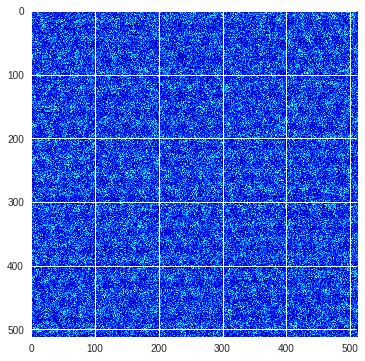

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (6, 6))
if np.ndim(image_data) == 2:
    ax.imshow(image_data, cmap = 'jet')
elif np.ndim(image_data) == 3:
    ax.imshow(image_data[0], cmap = 'jet')

Save numpy data to your local disk:

In [0]:
_filename = os.path.splitext(filename)[0]+'.npy'
np.save(_filename, image_data)
files.download(_filename)